<a href="https://colab.research.google.com/github/mayuripandey/Data-Analysis/blob/main/TwitterNetworkAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import networkx as nx

In [2]:
consumer_key= "QsmNroZ5V6ghSPJ1TEGwMA2QR"
consumer_secret_key="E7lHrsHc0P3EU6MYSHdzpmSkqXMNzCJYf6Mk9veCmoEB78pgIg"
access_token="3382755314-upIENhytORCLH3EKAQJl0GrHFbMXsfyHKfqlRna"
access_token_secret="5i4U55MU7dvwtCN5v8ZALik5XD4qZK3Jg8bkhFrVFhscu"

In [3]:
auth=tweepy.OAuthHandler(consumer_key,consumer_secret_key)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True,compression=True)

In [4]:
me=api.get_user(screen_name="aria68632")
me.id

552192443

In [5]:
#creating edge dataframe
#retrieve list of followers
user_list=["552192443"]
follower_list=[]
for user in user_list:
    followers=[]
    try:
        for page in tweepy.Cursor(api.followers_ids, user_id=user).pages():
            followers.extend(page)
            print(len(followers))
    except tweepy.TweepError:
        print("error")
        continue
    follower_list.append(followers)

299


In [6]:
#put list of followers into dataframe
df=pd.DataFrame(columns=["source", "target"]) #empty dataframe
df['target']=follower_list[0] #set the list of followers as the target column
df['source']=3382755314 #my userid is the source

In [7]:
df

,source,target
0,3382755314,998833808387510272
1,3382755314,1488471591554109442
2,3382755314,821777050914717699
3,3382755314,1351672967370047490
4,3382755314,1484653332
...,...,...
294,3382755314,535712765
295,3382755314,527695853
296,3382755314,231894509
297,3382755314,111957881


In [8]:
G=nx.from_pandas_edgelist(df,"source","target") #turn df into graph
pos=nx.spring_layout(G) #specify layout for viz

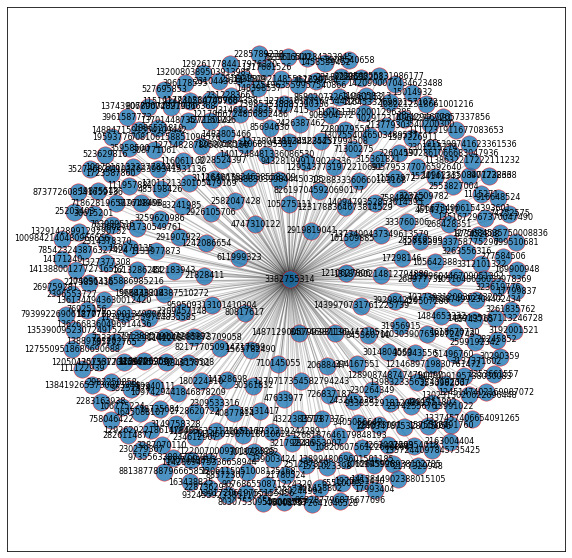

In [9]:
import matplotlib.pyplot as plt 
f,ax=plt.subplots(figsize=(10,10))
plt.style.use('ggplot')
nodes=nx.draw_networkx_nodes(G,pos,alpha=0.8)
nodes.set_edgecolor('r')
nx.draw_networkx_labels(G,pos,font_size=8)
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.2)

In [10]:
 #get the followers of my 191 followers
user_list=list(df['target'])# list of my 191 followers

for userID in user_list:
    print(userID)
    followers=[]
    follower_list=[]

    # fetching the user
    user=api.get_user(userID)
    #fetching the followers_count
    followers_count=user.followers_count

    try:
        for page in tweepy.Cursor(api.followers_ids,user_id=userID).pages():
            followers.extend(page)#grow the list,instead of creating a list of lists
            #print(len(followers))
            if followers_count >= 5000: #take only the first 5000
                break
    except tweepy.TweepError:
        print('error')
        continue
    follower_list.append(followers)
    temp=pd.DataFrame(columns=['source','target'])
    temp['target']=follower_list[0]
    temp['source']=userID
    df=df.append(temp)
    df.to_csv("FariaNetworkofFollowers.csv")

998833808387510272
1488471591554109442
821777050914717699
1351672967370047490
1484653332
1925151410
1487129005799387136
148398537
251237359
1439970731761225739
1384192653730873344
1082060756122660864
523216510
1196058313
1242086654


Rate limit reached. Sleeping for: 876


2553827004
1333809214855122947
1271482878958940160
1270739390134980613
15014932
error
1096233508471738368
1388970120
180224310
2599192342
1420900070434623488
1206115051008135168
1458559452
1275684535750008836
840746981190447105
1097816132327784449


Rate limit reached. Sleeping for: 895


88572307
18735684
13991022
1270717354582794243
1062643928938102785
277584506
2177329948
1413880012772716552
89940111
error
1417409195738030083
1439195187113246728
1414503987018010624
1374390780672897031
163438825
error
19593776


Rate limit reached. Sleeping for: 894


1353900952307249152
1280058534068195331
1177312847459684358
312791760
1275839533758775296
1245147402169987072
1236726956
1292617784417976320
269759281
1618670720
17799837
35958500
4322383513
988830399844450305
21828411


Rate limit reached. Sleeping for: 894


3405056649
919748498
1413844902388015105
230279367
2728620722
21780524
959509313101410304
285819599
1409479352853614595
169900948
1389948069601501185
401458802
3232509782
873452808
105642388


Rate limit reached. Sleeping for: 893


3018224882
826197045920690177
76925156
3259620986
error
1401248481336086530
3312101322
452183943
95252378
868020732634161152
723243172290142208
error
85694630
2309533316
1164533269821571072
1403039076580724743
230264349


Rate limit reached. Sleeping for: 892


2582047428
1009842140480966656
1398323356324319233
3261835762
1391720619755155456
803075309558001667
333760306
1082212318661001216
1139960446709051392
2318213621
881387788796665856
943281999179022336
1278310177167544320
973556338847567872
1329142899129290752


Rate limit reached. Sleeping for: 891


25203403
390722263
1361344943630012420
806790040219066368
315361821
1051648636033978369
394167551
1357244097845735425
1205042575377346560
31956915
1289087487474794497
1373400437349613579
1103763399341531136
1240347875328045056
1370144873572151296


Rate limit reached. Sleeping for: 891


916648524
791388579117268992
1273804381285224451
65510093
1302861066683047936
1362668360496914436
1210627806
16995996
1214689719830761472
30615201
1275509518680690688
1138632217222111232
1302554046503489537
790087972641046528
1524141343


Rate limit reached. Sleeping for: 890


111122939
1337457406654091265
3014804560
error
106775224
1320080389503913985
1645088107
1328833360660103168
1318760214812794880
74252575
17298146
845360700
1314682336357777415
83241985
105275111
1024294677657337856


Rate limit reached. Sleeping for: 889


error
1295437731972210691
793992269061877760
2353661557
305343556
1111231911677083653
1097429441846878209
1029123149642772481
2374255676
2280079550
error
1220070009701048325
1302313020622696448
1301361208784756737
762874992304402434
485198426
429507280


Rate limit reached. Sleeping for: 889


2982250858
30290359
1142869475336658944
611999323
14328698
1292629221861478403
error
30561832
2841953907
2919819041
21377930
3961587773
3263556316
1037393120936243202
error
160278135
184917701


Rate limit reached. Sleeping for: 888


1327377308
15755364
11567972
1015398741623361536
932455923385110529
47633977
718628196577619968
1128295303713558528
311165615
1210344835237994508
308771061
1134393559744835585
1244648885873709058
1268187646179848193
71300275


Rate limit reached. Sleeping for: 886


4263007693
80817617
268977739
1066734906154393601
1254963559957540866
873772608541659136
3028524397
40877814
1264067824638558209
2826114877
1115271
785423243876327424
758489762
14171240
22604597


Rate limit reached. Sleeping for: 885


720602701730549761
289873091
799510681
error
726837187
1133977873
1151924840510709760
1015117732319244289
1231788364673814529
157787375
4747310122
703989516
708106158851096576
739853538885390336
error
85743765
268428351


Rate limit reached. Sleeping for: 886


1317601526
error
1184666357121671169
1217966724856852486
101509885
1201121330105479169
905795377076592640
1040963355886985216
17993404
293632201
20688447
1101613820001296385
239003424
908904372
933855291812089857
868287796875677696


Rate limit reached. Sleeping for: 885


907686550871224320
error
873056855831986177
783361344284323845
error
3287070110
4391751802
116061102
2226954018
error
3540200300
3192001521
3149758328
3137371602
3007448816
2432452381
2926105706
2900540658


Rate limit reached. Sleeping for: 886


323619776
28245852
2530962007
error
2426387462
396178595
error
2396553727
1565782490
18531417
2314378370
2280244994
2287362912
2301515274
2275851416
2310443634
2285789238


Rate limit reached. Sleeping for: 885


2283163938
2312283661
321792286
2209457148
2163004404
error
1886521819
1613286284
1723587860
51496760
710145055
1483805466
1566448214
461620194
1531023398
427130942


Rate limit reached. Sleeping for: 885


19875548
291907922
1507226911
error
758046422
461431137
error
234612907
548048533
352736824
523629816
535712765
527695853
231894509
111957881
error
392984254
error


In [11]:
df=pd.read_csv("FariaNetworkofFollowers.csv") #read the new csv
G= nx.from_pandas_edgelist(df,'source','target')# turn df into a graph, using networkX

In [12]:
G.number_of_nodes() #find the total number of nodes in this graph

247079

In [13]:
# find the most influential nodes in the network using centrality
#this code finds the number of connections of each node, the degree of each node, and sorts them in descending order
G_sorted=pd.DataFrame(sorted(G.degree, key=lambda x: x[1], reverse=True))# true means sort in descending order
#key with lambda function returns the second element in the degree list
G_sorted.columns=['nsconst','degree']
G_sorted.head()

,nsconst,degree
0,1.271483e+18,5009
1,2.318214e+09,5007
2,4.263008e+09,5007
3,2.182841e+07,5006
4,2.137793e+07,5005


In [14]:
G_sorted.iloc[1]["nsconst"]

2318213621.0

In [15]:
G_tmp=nx.k_core(G,5) #take nodes from 122k to 684 nodes
#degree of node is the number of connections it has to other nodes. I think 5 connections is good for my small network

In [16]:
len(G_tmp)

2126

In [17]:
!pip install community

In [18]:
!pip install python_louvain

In [19]:
# easier to do network analytics on small graph, split the graph into groups using community detecting algorithm
from community import community_louvain
partition=community_louvain.best_partition(G_tmp)

#turn partition into a dataframe:
partition1=pd.DataFrame([partition]).T
partition1=partition1.reset_index()
partition1.columns=['names','groups']

In [20]:
partition1.head()

,names,groups
0,1.275685e+18,1.0
1,1.270717e+18,3.0
2,1.062644e+18,1.0
3,1.292618e+18,1.0
4,9.432820e+17,2.0


In [21]:
# since network is smaller, degree centrality code needs to be run again
G_sorted=pd.DataFrame(sorted(G_tmp.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns=['names','degree']
dc=G_sorted
G_sorted.head()

,names,degree
0,3.028524e+09,457
1,2.260460e+07,410
2,1.015099e+08,393
3,2.374256e+09,371
4,1.432870e+07,357


In [23]:
len(partition1)

2126

In [24]:
len(dc)

2126

In [25]:
combined=pd.merge(dc, partition1, how='left', left_on='names', right_on='names')
#two different datasets, 1 wehere the nodes are split into groups and the other where the degrees of each node is shown
combined.head()

,names,degree,groups
0,3.028524e+09,457,2.0
1,2.260460e+07,410,2.0
2,1.015099e+08,393,0.0
3,2.374256e+09,371,0.0
4,1.432870e+07,357,2.0


In [26]:
len(combined)

2180

In [27]:
combined.tail()

,names,degree,groups
2175,9.985111e+17,5,2.0
2176,7.312167e+07,5,2.0
2177,6.183312e+07,5,2.0
2178,3.092382e+09,5,2.0
2179,2.954850e+07,5,3.0


In [28]:
combined['groups']

0       2.0
1       2.0
2       0.0
3       0.0
4       2.0
       ... 
2175    2.0
2176    2.0
2177    2.0
2178    2.0
2179    3.0
Name: groups, Length: 2180, dtype: float64

In [29]:
G_tmp

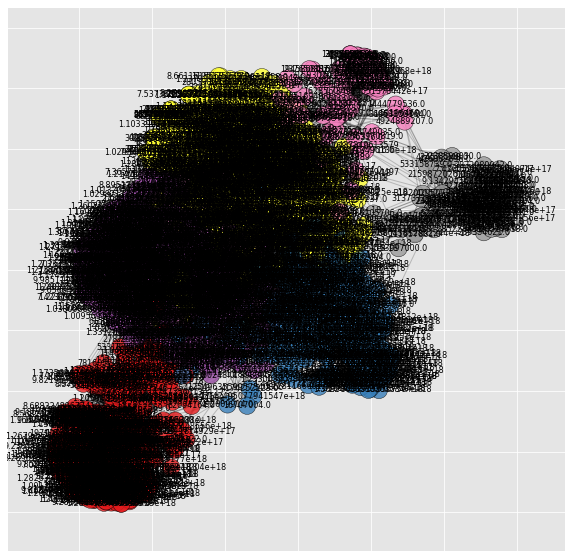

In [30]:
pos = nx.spring_layout(G_tmp)
f, ax=plt.subplots(figsize=(10,10))
plt.style.use('ggplot')

#cc=nx.betweenness_centrality(G_tmp)
#betweenness centrality of a noce is the sum of the fractions of all pairs shortest pahths

nodes=nx.draw_networkx_nodes(G_tmp, pos, cmap=plt.cm.Set1, node_color=partition1['groups'], alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G_tmp, pos, font_size=8)

nx.draw_networkx_edges(G_tmp, pos, width=1.0, alpha=0.2)
plt.savefig('FariaTwitterFollowers.png')

#figure out how to colour nodes based on groups
#https://stackoverflow.com/questions/57113398/matplotlib-scatter-fails-with-error-c-argument-has-n-elements-which-is-not-a

In [31]:
partition1=partition1.rename(columns={"names": "Id"}) #Gephi prefers node column to be called ID
edges=nx.to_pandas_edgelist(G_tmp)
nodes=partition1['Id']

edges.to_csv("edges.csv")
partition1.to_csv("nodes.csv")